In [ ]:

##### Load libraries #####

import matplotlib.pyplot as plt
import cvxpy as cp
import numpy as np
from numpy.linalg import norm
## generat data


def dataset(num_points):
 np.random.seed(0)
 X = np.random.randn(num_points, 2)
 Y_xor = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
 y = np.array([1 if i else -1 for i in Y_xor])
 print('Actual Label: \n', y)
 return X, y



Actual Label: 
 [-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1
 -1  1]
The optimal value is:  -14.517608299473952
A solution multipliers are: 
 [ 1.00000000e+00  3.63047828e-01 -2.53375902e-22  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  8.70907972e-01 -1.59348022e-22
  5.79749428e-01  1.00000000e+00  5.50477643e-24  1.00000000e+00
  9.50205650e-01  1.00000000e+00 -1.77935023e-22  1.00000000e+00
  3.08505077e-22  5.35977183e-01  1.00000000e+00  3.26618895e-01
  1.00000000e+00  1.00000000e+00]
The optimal value is:  -62.71507601004444
A solution multipliers are: 
 [ 7.86776828e-01 -1.74130874e-21  2.82219023e-21  1.00000000e+01
  1.00000000e+01  5.15746859e-01  1.00000000e+01  5.80345416e+00
  1.00082276e+00  1.40229930e+00  1.05559669e+00 -3.52951769e-21
  3.26577778e-21  1.00000000e+01 -1.02186407e-21  1.00000000e+01
 -2.04351415e-21  1.00000000e+01  8.80094198e-22  1.00000000e+01
 -2.58899

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


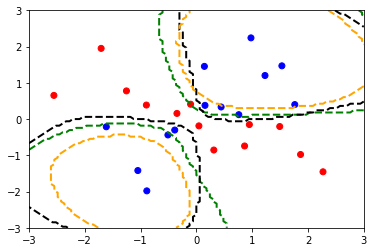

In [ ]:
######## Functions ########
# Kernel definition Gaussian 
def kernel(x, gamma): 
	return np.exp(-gamma*(norm(x)**2))

# Gamma Matrix computation

def gam_matrix(data, gamma , kernel):
	nr_data = data.shape[0]
	gam_matrix = np.array([kernel(data[i]-data[j],gamma) \
				               	 for i in range(nr_data) \
					             for j in range(nr_data)]) \
					             .reshape(nr_data,nr_data)
	return gam_matrix

# optimization SVM problems


def optmization_cv(data, gamma, kernel, gam_matrix, constantVal):
	# Quadratic of objective function part
	nr_data = data.shape[0] 
	P = np.outer(y,y)*gam_matrix(data, gamma , kernel)

	q = -1*np.ones(nr_data)

    # Constraints part
	G = -1*np.eye(nr_data, nr_data)
	N = np.eye(nr_data, nr_data)
	h = np.zeros(nr_data)
	k = constantVal*np.ones(nr_data)
   
	A = np.ones(nr_data)*y
	b = 0.0

	# Define and solve the CVXPY problem.
	x = cp.Variable(nr_data)
	problem = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T@x),
                 [G@x <= h,
				  N@x <= k,
                  A@x == b])
	problem.solve()

	print("The optimal value is: ", problem.value)
	print("A solution multipliers are: \n", x.value)

	# multipliers of dua-form SVM optimization 
	alpha = x.value
	alpha_positive = alpha[alpha>1.0e-8]
	support_vector = X[alpha>1.0e-8]
	support_vector_Y = y[alpha>1.0e-8]
	return alpha_positive, support_vector, support_vector_Y

# compute intercept

def compute_b(alfa, sup_x, sup_y, gamma):
	# retrieve multipliers (alpha)
	# support vector x
	# support vector y	
	intercept=0.0
	for I_X_DO in range(len(sup_vector)):
		dummy = np.sum( (alfa[j]*sup_y[j]*kernel(sup_x[j]-sup_x[I_X_DO], gamma)) \
									for j in range(len(sup_x)) )
		dummy = sup_y[I_X_DO] - dummy
		intercept += dummy
	intercept = intercept/len(sup_x)
	return intercept


# Compute the accuracy of all training samples

def prediction(data,alpha,sup_vector_y,sup_vector):
	y_pred=np.zeros(data.shape[0])
	for I_X_DO in range(data.shape[0]):
		y_pred[I_X_DO]=np.sign(np.sum(( alpha[j]*sup_vector_y[j]\
						                *kernel(sup_vector[j]-data[I_X_DO], gamma) \
							            for j in range(len(sup_vector)) )) + b)
	return y_pred


# Constant value
constant_value1=1
constant_value2=10
constant_value3=0.1
gamma=0.5

# Data input

np.random.seed(0)
X = np.random.randn(26, 2)
Y_xor = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.array([1 if i else -1 for i in Y_xor ])
print('Actual Label: \n', y)

# support vectors x, y and multipliers
alpha1, sup_vector1, sup_vector_y1 = optmization_cv(X, gamma, kernel, gam_matrix, constant_value1)
alpha2, sup_vector2, sup_vector_y2 = optmization_cv(X, gamma, kernel, gam_matrix, constant_value2)
alpha3, sup_vector3, sup_vector_y3 = optmization_cv(X, gamma, kernel, gam_matrix, constant_value3)


# compute intercept
b1 = compute_b(alpha1, sup_vector1, sup_vector_y1, gamma)
b2 = compute_b(alpha2, sup_vector2, sup_vector_y2, gamma)
b3 = compute_b(alpha3, sup_vector3, sup_vector_y3, gamma)

# prediction 
y_prediction1 =  prediction(X,alpha1,sup_vector_y1,sup_vector1)
print('Predicted Label: \n', y_prediction1)
y_prediction2 =  prediction(X,alpha2,sup_vector_y2,sup_vector2)
print('Predicted Label: \n', y_prediction2)
y_prediction3 =  prediction(X,alpha3,sup_vector_y3,sup_vector3)
print('Predicted Label: \n', y_prediction3)

# prepare to plot contour
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_pred = np.c_[xx.ravel(), yy.ravel()]
Z1 = prediction(X_pred,alpha1,sup_vector_y1,sup_vector1)
Z1 = Z1.reshape(xx.shape)
Z2 = prediction(X_pred,alpha2,sup_vector_y2,sup_vector2)
Z2 = Z2.reshape(xx.shape)
Z3 = prediction(X_pred,alpha3,sup_vector_y3,sup_vector3)
Z3 = Z3.reshape(xx.shape)

contours = plt.contour(xx, yy, Z1, levels=[0], colors = ['green'] ,linewidths=2, linestyles='dashed' )
contours2 = plt.contour(xx, yy, Z2, levels=[0], colors = ['black'] ,linewidths=2, linestyles='dashed' )
contours3 = plt.contour(xx, yy, Z3, levels=[0], colors = ['orange'] ,linewidths=2, linestyles='dashed' )

# plot data in 2D
colors = np.where(y==1, 'r', 'b')
plt.scatter(X[:,0], X[:,1], c = colors)
plt.show()

In [ ]:

# Kernel definition polynomial

def kernel(x, y, degree): 
	return np.power((np.dot(x,y) + 1), degree)

# Gamma Matrix computation

def gam_matrix(data, degree,kernel):
	nr_data = data.shape[0]
	gam_matrix = np.array([kernel(data[i], data[j], degree) \
				               	   for i in range(nr_data) \
					               for j in range(nr_data)]) \
					               .reshape(nr_data,nr_data)
	return gam_matrix

# optimization SVM problems

def optmization_cv(data, degree, kernel, gam_matrix, constantVal):
	# Quadratic of objective function part
	nr_data = data.shape[0] 
	P = np.outer(y,y)*gam_matrix(data, degree,kernel)

	q = -1*np.ones(nr_data)

    # Constraints part
	G = -1*np.eye(nr_data, nr_data)
	N = np.eye(nr_data, nr_data)
	h = np.zeros(nr_data)
	k = constantVal*np.ones(nr_data)
   
	A = np.ones(nr_data)*y
	b = 0.0

	# Define and solve the CVXPY problem.
	x = cp.Variable(nr_data)
	problem = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T@x),
                 [G@x <= h,
				  N@x <= k,
                  A@x == b])
	problem.solve()

	print("The optimal value is: ", problem.value)
	print("A solution multipliers are: \n", x.value)

	# multipliers of dua-form SVM optimization 
	alpha = x.value
	alpha_positive = alpha[alpha>1.0e-8]
	support_vector = X[alpha>1.0e-8]
	support_vector_Y = y[alpha>1.0e-8]
	return alpha_positive, support_vector, support_vector_Y

# compute intercept

def compute_b(alfa, sup_x, sup_y, degree):
	# retrieve multipliers (alpha)
	# support vector x
	# support vector y	
	intercept=0.0
	for I_X_DO in range(len(sup_vector)):
		dummy = np.sum( (alfa[j]*sup_y[j]*kernel(sup_x[j], sup_x[I_X_DO], degree)) \
									for j in range(len(sup_x)) )
		dummy = sup_y[I_X_DO] - dummy
		intercept += dummy
	intercept = intercept/len(sup_x)
	return intercept


# Compute the accuracy of all training samples

def prediction(data):
	y_pred=np.zeros(data.shape[0])
	for I_X_DO in range(data.shape[0]):
		y_pred[I_X_DO]=np.sign(np.sum(( alpha[j]*sup_vector_y[j]\
						                *kernel(sup_vector[j], data[I_X_DO], degree) \
							            for j in range(len(sup_vector)) )) + b)
	return y_pred



Actual Label: 
 [-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1
 -1  1 -1  1 -1 -1]
Actual Label: 
 [-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1
 -1  1 -1  1 -1 -1]
The optimal value is:  -14.50214585148466
A solution multipliers are: 
 [1.00000000e+00 7.61874037e-01 4.12059756e-01 1.00000000e+00
 1.00000000e+00 8.85928220e-01 1.00000000e+00 7.09452084e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 3.12132158e-24
 8.57729324e-01 1.00000000e+00 6.28707928e-01 1.00000000e+00
 7.26890421e-01 1.00000000e+00 9.27269444e-02 1.00000000e+00
 2.24107163e-01 1.00000000e+00 8.25302139e-01 7.31667582e-01
 1.00000000e+00 4.49569313e-01 4.53895464e-01 1.00000000e+00
 1.00000000e+00 1.42141575e-01]
The optimal value is:  -36.399819057445455
A solution multipliers are: 
 [ 1.31056397e+00  7.35212313e-01  4.42963312e-01  1.95465635e+00
  5.42394167e+00  1.11191900e+00  1.14610297e+00 -4.02249266e-21
  7.91877057e-01  1.44207198e-21  1.07497333e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


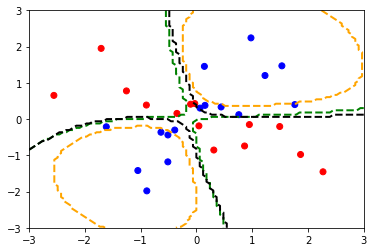

In [ ]:

# Constant value
constant_value1=1
constant_value2=10
constant_value3=0.1

degree = 2


# Data input

np.random.seed(0)
X, y = dataset(30)
print('Actual Label: \n', y)

# support vectors x, y and multipliers
alpha1, sup_vector1, sup_vector_y1 = optmization_cv(X, degree, kernel, gam_matrix, constant_value1)
alpha2, sup_vector2, sup_vector_y2 = optmization_cv(X, degree, kernel, gam_matrix, constant_value2)
alpha3, sup_vector3, sup_vector_y3 = optmization_cv(X, degree, kernel, gam_matrix, constant_value3)


# compute intercept
b1 = compute_b(alpha1, sup_vector1, sup_vector_y1, degree)
b2 = compute_b(alpha2, sup_vector2, sup_vector_y2, degree)
b3 = compute_b(alpha3, sup_vector3, sup_vector_y3, degree)

# prediction 
y_prediction1 =  prediction(X,alpha1,sup_vector_y1,sup_vector1)
print('Predicted Label: \n', y_prediction1)
y_prediction2 =  prediction(X,alpha2,sup_vector_y2,sup_vector2)
print('Predicted Label: \n', y_prediction2)
y_prediction3 =  prediction(X,alpha3,sup_vector_y3,sup_vector3)
print('Predicted Label: \n', y_prediction3)

# prepare to plot contour
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_pred = np.c_[xx.ravel(), yy.ravel()]
Z1 = prediction(X_pred,alpha1,sup_vector_y1,sup_vector1)
Z1 = Z1.reshape(xx.shape)
Z2 = prediction(X_pred,alpha2,sup_vector_y2,sup_vector2)
Z2 = Z2.reshape(xx.shape)
Z3 = prediction(X_pred,alpha3,sup_vector_y3,sup_vector3)
Z3 = Z3.reshape(xx.shape)

contours = plt.contour(xx, yy, Z1, levels=[0], colors = ['green'] ,linewidths=2, linestyles='dashed' )
contours2 = plt.contour(xx, yy, Z2, levels=[0], colors = ['black'] ,linewidths=2, linestyles='dashed' )
contours3 = plt.contour(xx, yy, Z3, levels=[0], colors = ['orange'] ,linewidths=2, linestyles='dashed' )

# plot data in 2D
colors = np.where(y==1, 'r', 'b')
plt.scatter(X[:,0], X[:,1], c = colors)
plt.show()